# 1. First load the Python toolkit we need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import sklearn.pipeline as pl
import sklearn.preprocessing as sp

pandas + numpy: Process data and read data.

matplotlib + seaborn: Data visualization.

Sklearn: It can carry out field labeling, data preprocessing, data set partition, algorithm model invocation, and so on.

# 2. Load the dataset

In [2]:
df = pd.read_csv('vehicles.csv', index_col = 0)
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


The CSV file is loaded from Pandas and stored using the variable name df.

Show the first five pieces of data in the dataset.

In [3]:
df.keys()

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

View the field name of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

Check the type of all the fields and if any are missing.

In [5]:
df.shape

(458213, 25)

View the number of rows and columns in the dataset.

We totally have 458213 rows and 25 columns. 

# 3. Drop irrelevant columns

In [6]:
df = df.drop(columns = ['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date'],
             axis = 1)

There are some columns that we are pretty sure having no correlations to the car prices. 

Such as the 'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'lat', 'long', 'posting_date'. 

We will drop all of them. 

After dropping all of those irrelevant columns, we show the new dataset as below: 

In [7]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,auburn,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,al
1,auburn,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,al
2,auburn,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,al
3,auburn,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al


# 4. Delete missing values

In [8]:
df.isnull().mean()

region          0.000000
price           0.000000
year            0.002292
manufacturer    0.039763
model           0.010576
condition       0.421071
cylinders       0.373494
fuel            0.007064
odometer        0.120693
title_status    0.005624
transmission    0.005329
drive           0.292851
size            0.701307
type            0.246038
paint_color     0.307375
state           0.000000
dtype: float64

We can see the percentage of the missing values of each column. 

Take the column “condition” as an example, the missing values in the “condition” column account for around 42% of all values. 

Since we have 458213 rows of data. 

Even though we drop all the missing data, we think we still have enough data for us to analyze. 

So, we decide to drop all null values. 

In [9]:
df = df.dropna()
df.isnull().mean()

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [10]:
df.shape

(87594, 16)

After dropping all null values, we still have 87594 rows and 16 columns. 

It’s enough for us to do the analysis. 

# 5. Handle Outliers

In the dataset, there must be some data that are not unusual in the real world. 

Those data will influence the performance of our models significantly. 

We will drop those outliers. 

For categorical features, it’s hard to determine which one is the outlier. 

We will only handle those numerical features. 

Such as “price”, “year”, and “Odometer”. 

## 5.1 Handle Price

In [11]:
price_range = sorted(df["price"])
price_left, price_right = np.percentile(price_range, [5, 95])
print(price_left, price_right)

600.0 34900.0


In [12]:
df = df[(df.price > price_left) & (df.price < price_right)]
df.shape

(78767, 16)

For the price, we will only take account into the prices that range from 5% to 95%. 

So, as you can see, we sort the prices and take out the data values at 5% and 95%, which are 600.0 and 34900.0. 

Then we will only consider the prices range from 600 to 34900. 

After dropping those outliers, we still have 78767 rows of data.  

## 5.2 Handle Odometer

The scatterplot shows that the abscissa is Odometer, and the ordinate is Price.

Here, the Odometer eigenvalue visualization example is used to demonstrate the elimination of outliers through the scatter diagram.

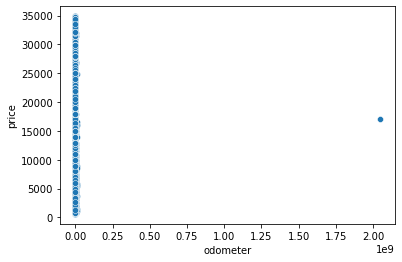

In [13]:
ax = sns.scatterplot(x = "odometer", y = "price", data = df)

Here, look at the scatter plot of the odometer, we can see one point that is too large. 

It’s not normal, we will find it and drop it. 

In [14]:
df["odometer"].max()

2043755555.0

In [15]:
df.drop(df[df["odometer"]==2043755555.0].index,inplace=True)

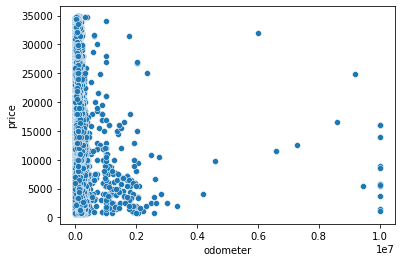

In [16]:
ax = sns.scatterplot(x="odometer", y="price", data=df)

After dropping the maximum odometer, we visualized the scatter plot of the odometer again. 

We still find that the points are not evenly distributed. 

There are too few points that the odometers are larger than 300000. 

So, we decide to drop those points.

In [17]:
df=df[(df.odometer < 300000)]

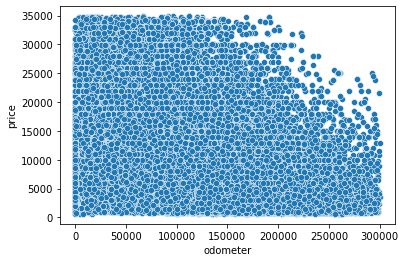

In [18]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

Finally, we visualized the scatter plot of the odometer again. 

We find those points are evenly distributed.

## 5.3 Handle Year

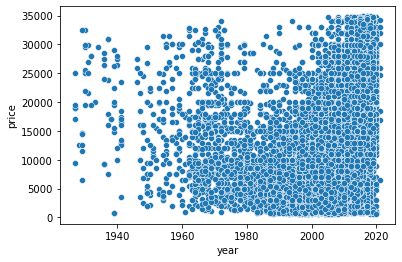

In [19]:
bx = sns.scatterplot(x="year", y="price", data=df)

As you can see in the scatter plot, cars that are too old will probably influence our data prediction. 

So, we remove the samples older than 1950. 

In [20]:
df=df[(df.year > 1950)]

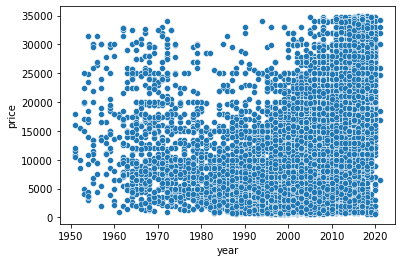

In [21]:
bx = sns.scatterplot(x="year", y="price", data=df)

Then we visualized the scatter plot again. 

Those points are evenly distributed.

# 6. Data visualization

## 6.1 The distribution of the prices

In this part, we will show the distributions of each feature and price. 

Then we will analyze the impact of each feature on the price of used cars and conclude the relationship between them. 

<AxesSubplot:title={'center':'Distribution of the prices'}, xlabel='price', ylabel='Count'>

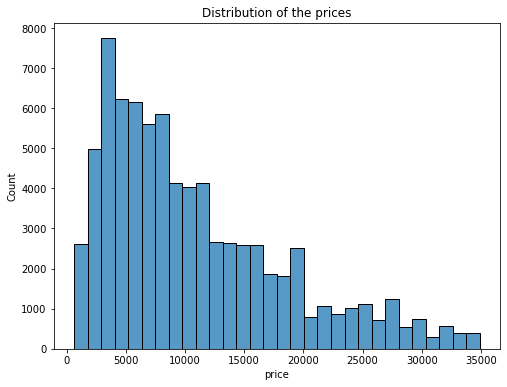

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Distribution of the prices')
sns.histplot(df['price'], bins=30, kde=False)

Look at the distribution of prices. 

People prefer the used cars that the price is between 3000 to 12000. 

Cars in this price range are more cost-effective and more common.

## 6.2 The distribution of odometers

<AxesSubplot:title={'center':'Distribution of the odometer'}, xlabel='odometer', ylabel='Count'>

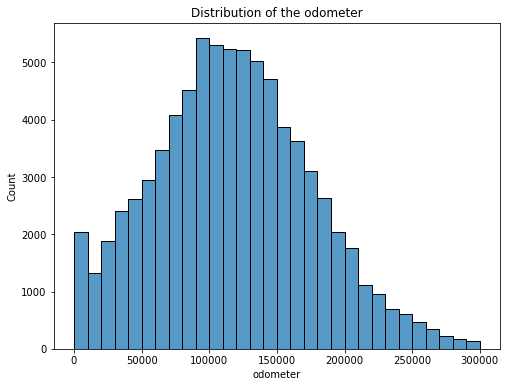

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Distribution of the odometer')
sns.histplot(df['odometer'], bins=30, kde=False)

Here, look at the distribution of odometers, we think people prefer cars that the odometer is between 70000 to 150000. 

## 6.3 The box plot of the prices on each color

<AxesSubplot:title={'center':'Box plot of the prices on each color'}, xlabel='paint_color', ylabel='price'>

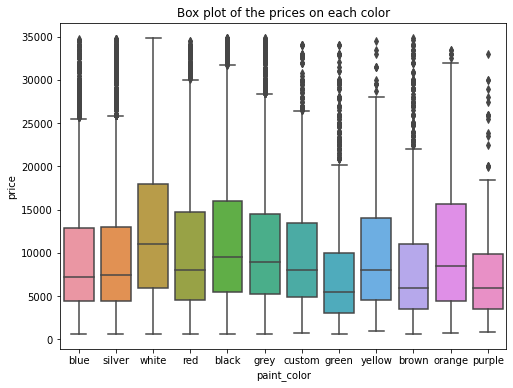

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each color')
sns.boxplot(x='paint_color', y = 'price', data = df)

There are 12 different common colors in the dataset. 

It seems that white, orange, black are the most popular colors. 

And green and purple are the least welcome colors. 

## 6.4 Box plot of the prices on each car type

<AxesSubplot:title={'center':'Box plot of the prices on each car type'}, xlabel='type', ylabel='price'>

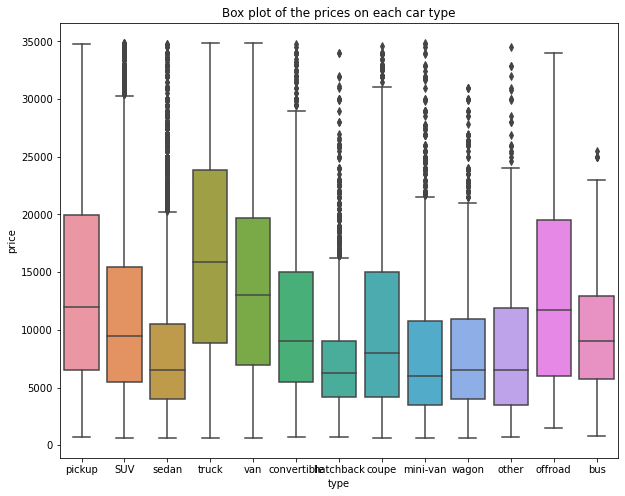

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Box plot of the prices on each car type')
sns.boxplot(x='type', y = 'price', data = df)

Truck, van, pickup cars are more expensive and sedan, mini-van hatchback are cheaper. 

## 6.5 Box plot of prices on each car condition

<AxesSubplot:title={'center':'Box plot of the prices on each car condition'}, xlabel='condition', ylabel='price'>

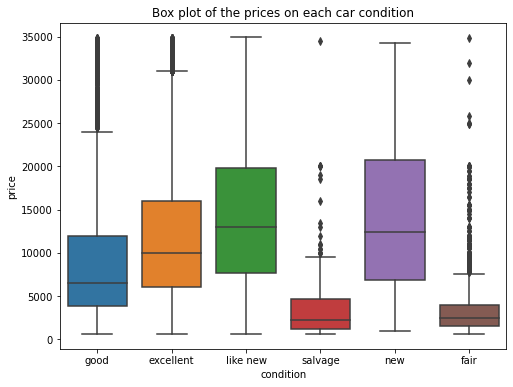

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car condition')
sns.boxplot(x='condition', y = 'price', data = df)

There are 6 types of car condition. 

New and like-new cars tend to be more expensive and cars with fair and salvage conditions tend to be much cheaper.

## 6.6 Box plot of the prices on each car cylinders 

<AxesSubplot:title={'center':'Box plot of the prices on each car cylinders'}, xlabel='cylinders', ylabel='price'>

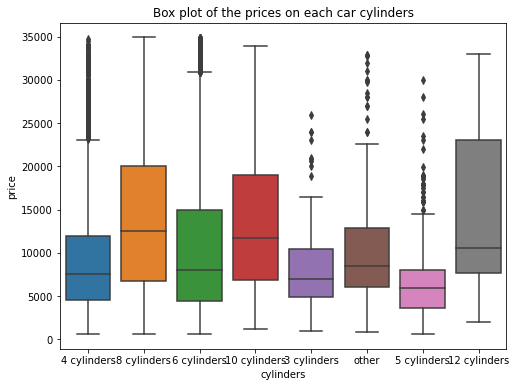

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car cylinders')
sns.boxplot(x='cylinders', y = 'price', data = df)

Besides the other, there are 7 common cylinders. 

Cars with 8, 10 cylinders are more expensive. 

Cars with 3, 5 cylinders are cheaper. 

## 6.7 Box plot of the prices on each car fuel

<AxesSubplot:title={'center':'Box plot of the prices on each car fuel'}, xlabel='fuel', ylabel='price'>

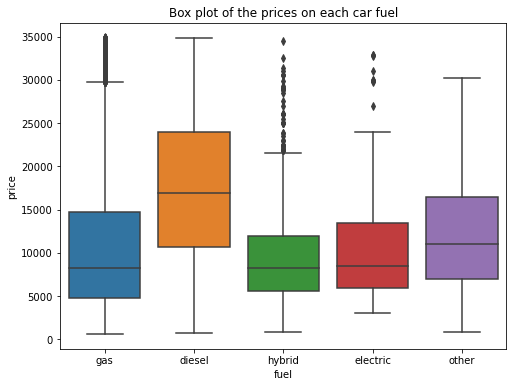

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car fuel')
sns.boxplot(x='fuel', y = 'price', data = df)

Besides the other, there are 4 common fuels. 

Diesel cars are more expensive than other cars. 

## 6.8 Box plot of the prices on each car transmission

<AxesSubplot:title={'center':'Box plot of the prices on each car transmission'}, xlabel='transmission', ylabel='price'>

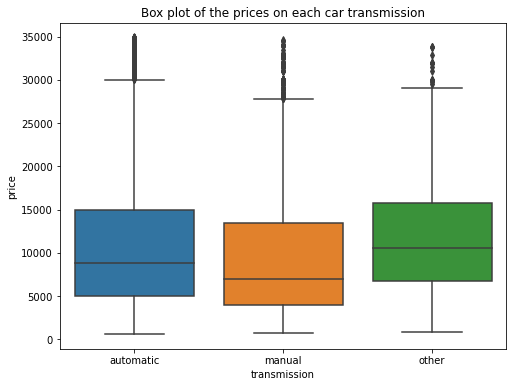

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car transmission')
sns.boxplot(x='transmission', y = 'price', data = df)

Cars with “other” transmission (possibly CVT) tend to be the most expensive. 

Cars with automatic transmission tend to be more expensive than those with manual transmission. 

## 6.9 Box plot of the prices on each car drive

<AxesSubplot:title={'center':'Box plot of the prices on each car drive'}, xlabel='drive', ylabel='price'>

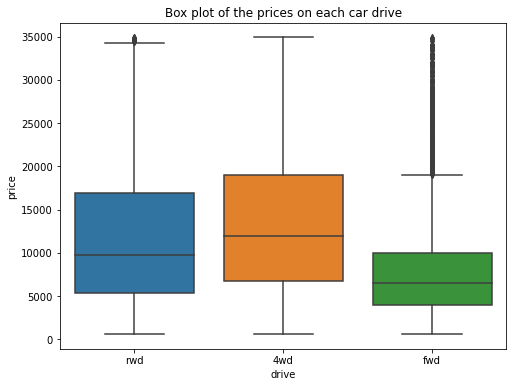

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car drive')
sns.boxplot(x='drive', y = 'price', data = df)

Cars equipped with all-wheel drives tend to be more expensive than those with front-wheel drive. 

## 6.10 Box plot of the prices on each car size

<AxesSubplot:title={'center':'Box plot of the prices on each car size'}, xlabel='size', ylabel='price'>

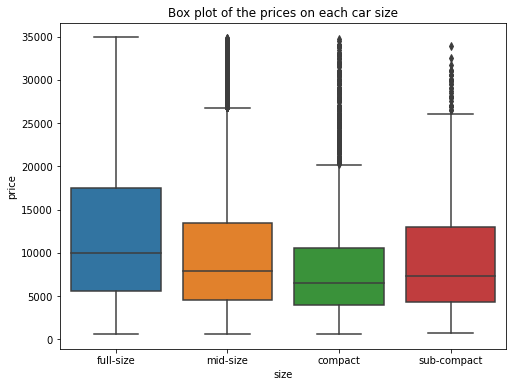

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car size')
sns.boxplot(x='size', y = 'price', data = df)

There are four types of car’s size. 

Full-size cars are more expensive than compact cars. 

## 6.11 Box plot of the prices on title status of a vehicle

<AxesSubplot:title={'center':'Box plot of the prices on each car title_status'}, xlabel='title_status', ylabel='price'>

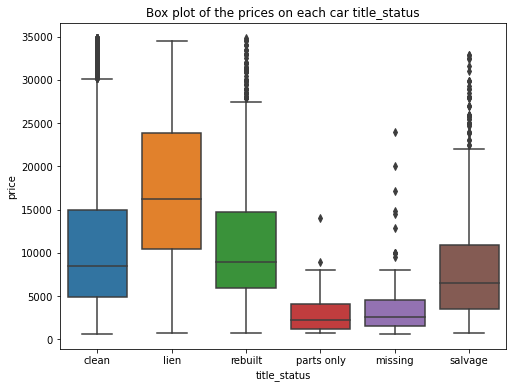

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Box plot of the prices on each car title_status')
sns.boxplot(x='title_status', y = 'price', data = df)

There are six different title statuses of cars. Lien cars are more expensive than other cars. 

## 6.12 The number of transaction of each state

<AxesSubplot:title={'center':'The number of transation of each state'}>

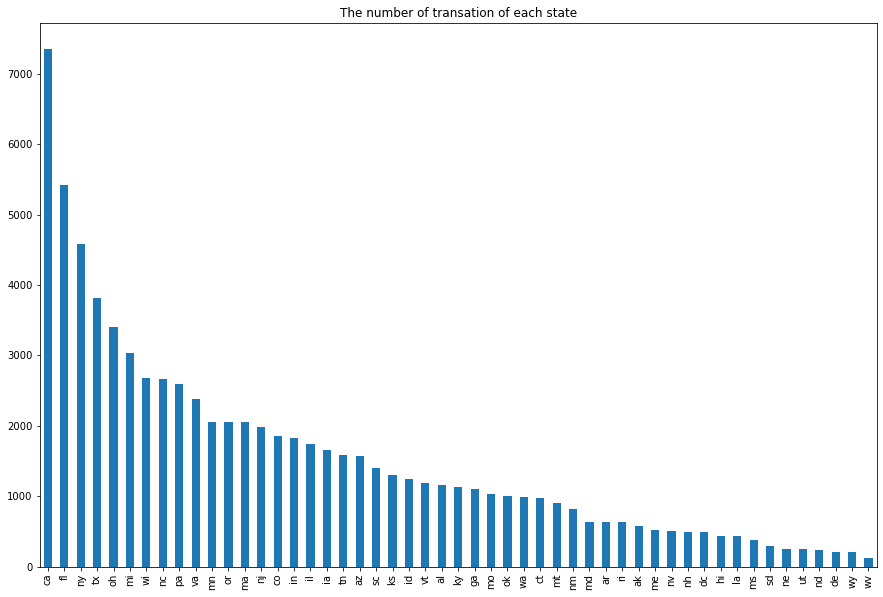

In [33]:
# df['state'].value_counts()
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('The number of transation of each state')
df['state'].value_counts().plot.bar(ax=ax)

The top three states with the most transactions are CA, FL, and NY. 

It’s reasonable because those states have more people. 

## 6.13 The mean car price of each state

<AxesSubplot:title={'center':'Mean car price of each state'}, xlabel='state'>

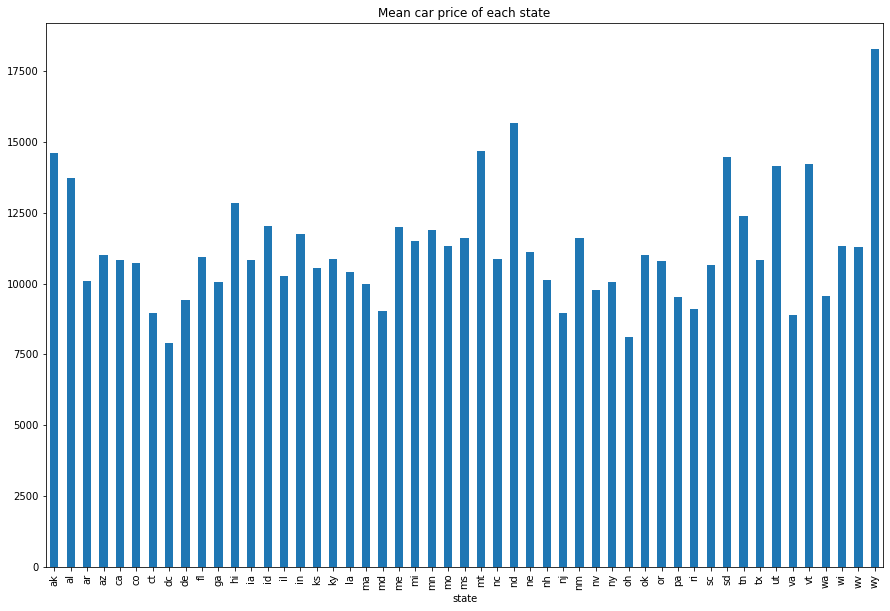

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Mean car price of each state')
df.groupby(['state']).mean()['price'].plot.bar(ax=ax)

We can see from the diagram, the mean car price of the WY state is the highest. 

But the transaction of this state is very small. 

So, the statement may not totally correct. 

But the number of transactions in NC state is large and the mean car price of this state is also expensive. 

## 6.14 The number of transactions of each manufacturer 

<AxesSubplot:title={'center':'The number of transation of each manufacturer'}>

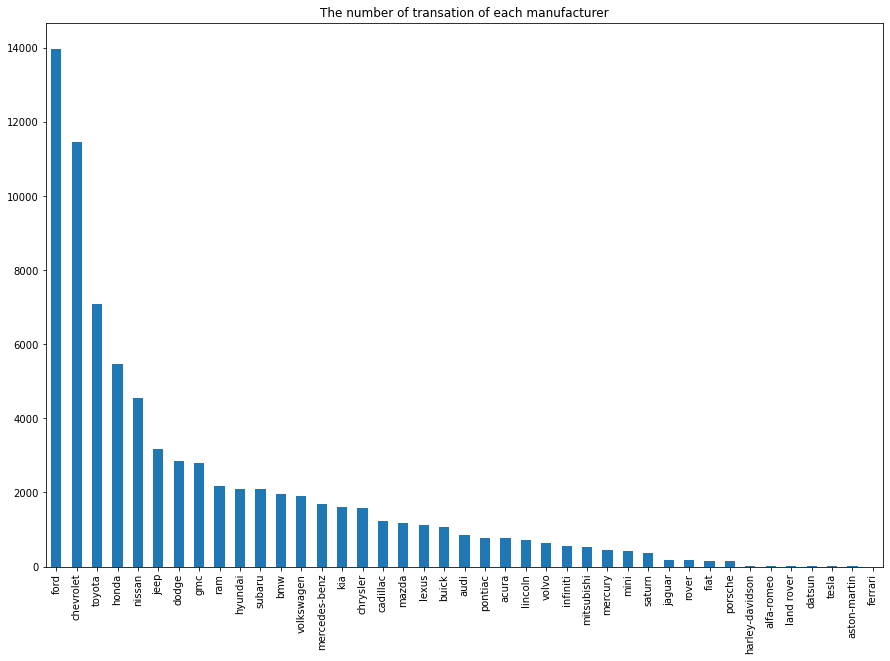

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('The number of transation of each manufacturer')
df['manufacturer'].value_counts().plot.bar(ax=ax)

As we can see in the diagram, the top 3 popular cars in the used car market are Ford, Chevrolet, and Toyota. 

## 6.15 The mean car price of each manufacturer

<AxesSubplot:title={'center':'Mean car price of each manufacturer'}, xlabel='manufacturer'>

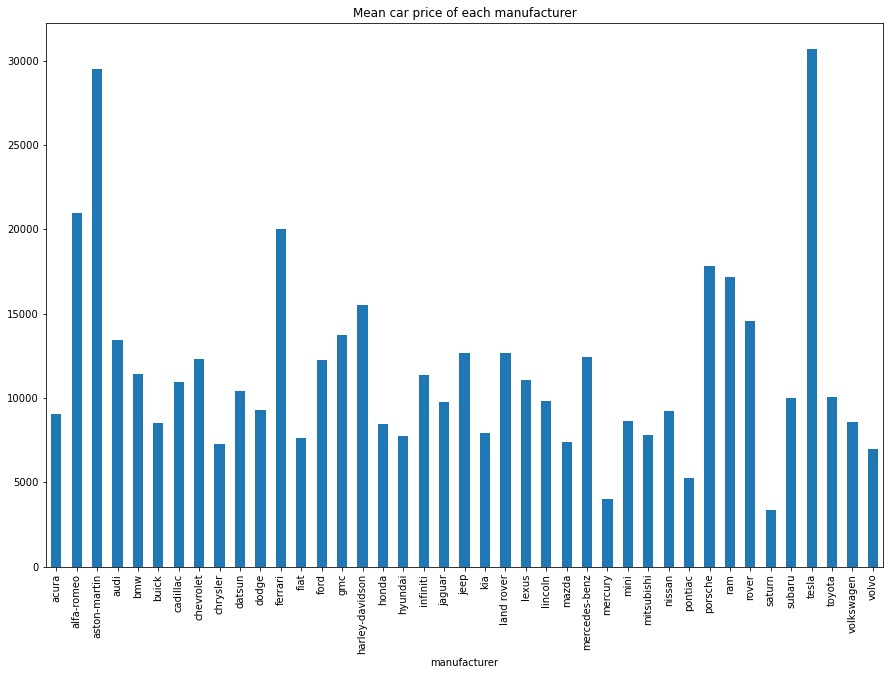

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Mean car price of each manufacturer')
df.groupby(['manufacturer']).mean()['price'].plot.bar(ax=ax)

Tesla and Aston Martin are the most expensive cars. 

And look at the mean car price of Ford, Chevrolet, and Toyota, they are not the cheapest, but they sold well. 

We think the cars in these three manufacturers are worth to buy. 

# 7. Handle Categorical Features

Since there are too many models, around 9547 different models. 

So, we decide to drop this column. 

After dropping this column, we transfer the rest categorical features into numerical features. 

And after all preparation, we still have 77918 rows and 15 columns for us to analyze. 

In [37]:
len(df['model'].unique())

9547

In [38]:
df = df.drop('model', axis = 1)
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
3,auburn,2000,1974.0,chevrolet,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,al
4,auburn,19500,2005.0,ford,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,al
14,auburn,4900,2003.0,ford,good,8 cylinders,gas,177000.0,clean,automatic,rwd,full-size,SUV,blue,al
47,auburn,6250,2010.0,ford,good,6 cylinders,gas,82000.0,clean,automatic,fwd,full-size,sedan,silver,al
65,auburn,27500,2015.0,jeep,like new,6 cylinders,gas,84000.0,lien,automatic,4wd,full-size,SUV,white,al


In [39]:
encode_columns = ['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 
                 'drive', 'size', 'type', 'paint_color', 'state']

le = LabelEncoder()
df[encode_columns] = df[encode_columns].apply(le.fit_transform)

In [40]:
df.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
3,16,2000,1974.0,7,2,3,2,190000.0,0,0,2,1,8,1,1
4,16,19500,2005.0,13,0,6,0,116000.0,1,0,0,1,8,1,1
14,16,4900,2003.0,13,2,6,2,177000.0,0,0,2,1,0,1,1
47,16,6250,2010.0,13,2,5,2,82000.0,0,0,1,1,9,9,1
65,16,27500,2015.0,20,3,5,2,84000.0,1,0,0,1,0,10,1


In [41]:
df.shape

(77918, 15)

# 8. Split training and test sets

In [42]:
y = df['price']
X = df.drop(['price'], axis = 1, inplace = False)

In [43]:
## Split the data into training and test data sets using test size of 0.2 and random states of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The data set is divided into a training set and test set according to the ratio of 8:2.

# 9. Model Selection

## 9.1 Model 1 - Linear Regression

Linear regression is one of the most commonly used predictive modeling techniques. 

It’s really easy to implement and it’s less complex to compare with other algorithms. 

In [44]:
## Create an instance of Linear Regression model
Linear_Regressor = linear_model.LinearRegression()

In [45]:
# Fit the training data to Linear Regeression
Linear_Regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
Linear_preds = Linear_Regressor.predict(X_test)

In [47]:
print('MSE: ', metrics.mean_squared_error(y_test, Linear_preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Linear_preds)))
print('R2: ', metrics.r2_score(y_test, Linear_preds))

MSE:  29920631.47756173
RMSE:  5469.9754549322915
R2:  0.4914044578518799


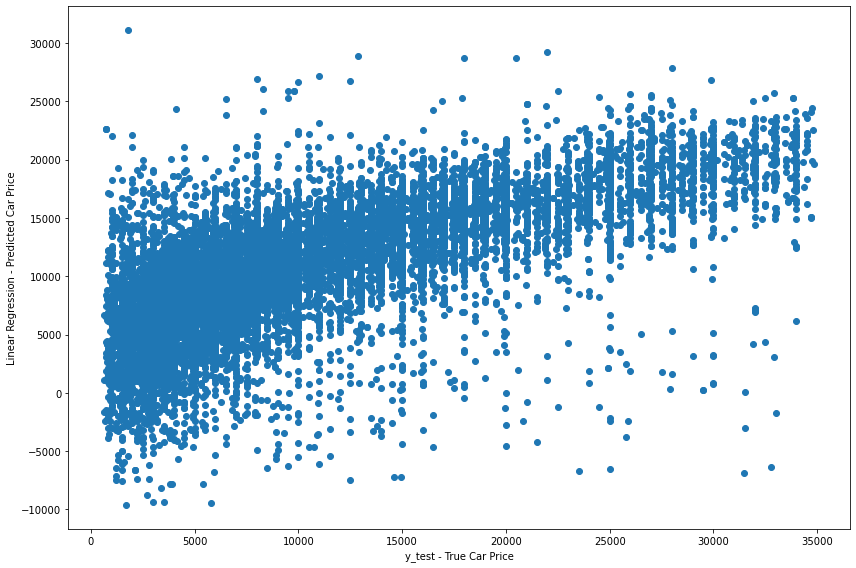

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, Linear_preds)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Linear Regression - Predicted Car Price')
plt.tight_layout()

From the result, we can see the performance of Linear Regression is not good. The r2 score is around 0.49. And in the diagram, we can even see the prediction of some test cases are negative numbers, which cannot be true in the real world.

To improve the performance of Linear Regression, in the beginning, I was thinking about the poor performance of linear regression that may be caused by overfitting. So, I used Lasso Regression to train the data and the result is shown below. 


## 9.2 Model 2 - Lasso Regression

Lasso Regression is a Linear Regression model with L1 regularization factor to eliminate the errors caused by the collinearity problem and overfitting. 

In [49]:
alphas = np.logspace(-4,4,12)
lasso = LassoCV(max_iter=10**6, alphas=alphas)
lasso.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-04, 5.33669923e-04, 2.84803587e-03, 1.51991108e-02,
       8.11130831e-02, 4.32876128e-01, 2.31012970e+00, 1.23284674e+01,
       6.57933225e+01, 3.51119173e+02, 1.87381742e+03, 1.00000000e+04]),
        max_iter=1000000)

In [50]:
lasso_preds = lasso.predict(X_test)

In [51]:
print('MSE: ', metrics.mean_squared_error(y_test, lasso_preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lasso_preds)))
print('R2: ', metrics.r2_score(y_test, lasso_preds))

MSE:  29920631.522075348
RMSE:  5469.975459001196
R2:  0.4914044570952306


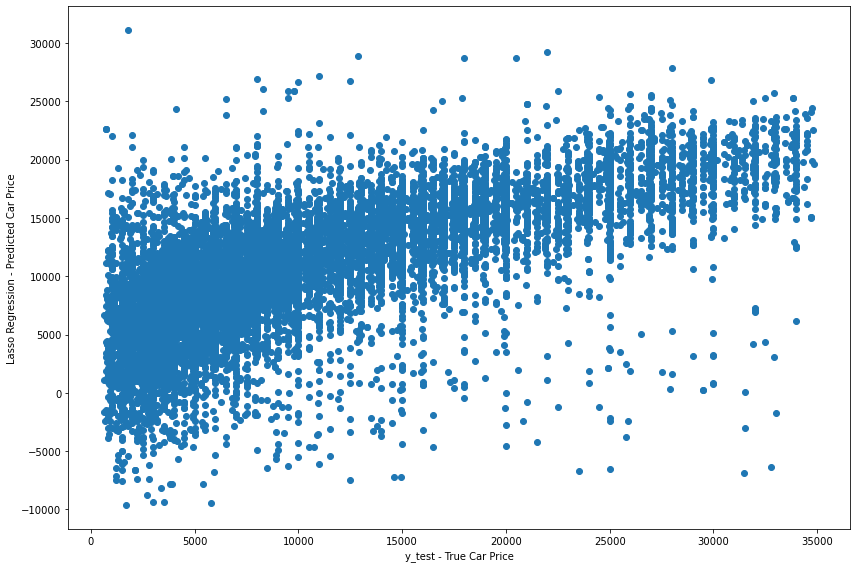

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, lasso_preds)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Lasso Regression - Predicted Car Price')
plt.tight_layout()

As you can see from the result, the r2 score is almost the same as the linear regression model. 

So, the poor performance of the linear model is not caused by overfitting. 

## 9.3 Model 3 - Polynomial linear regression

Polynomial Linear Regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the dependent variable and independent variables. 

In [53]:
Poly_Linear_Regressor = pl.make_pipeline(sp.PolynomialFeatures(2),linear_model.LinearRegression())

In [54]:
Poly_Linear_Regressor.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [55]:
Poly_Linear_preds = Poly_Linear_Regressor.predict(X_test)

In [56]:
print('MSE: ', metrics.mean_squared_error(y_test, Poly_Linear_preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Poly_Linear_preds)))
print('R2: ', metrics.r2_score(y_test, Poly_Linear_preds))

MSE:  17195299.567258783
RMSE:  4146.721544456389
R2:  0.7077116265955897


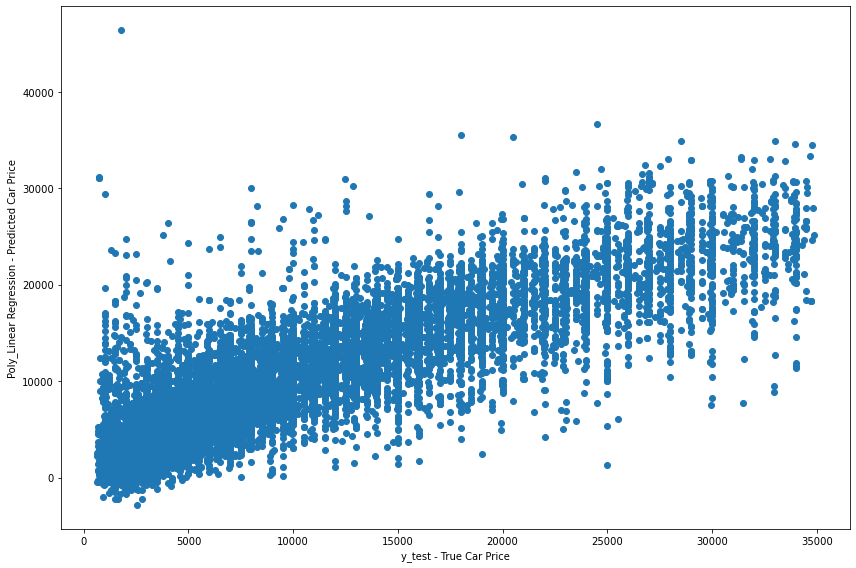

In [57]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, Poly_Linear_preds)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Poly_Linear Regression - Predicted Car Price')
plt.tight_layout()

Compare to the result of Polynomial Linear Regression with Linear Regression, the performance of Polynomial Linear Regression has a great improvement. The r2 score is around 0.71. But it’s not enough. We need more models to train our data. 

## 9.4  Model 4 - Decision Tree

The decision tree will build a regression model in the form of a tree structure. As the dataset is broken down into smaller subsets, an associated decision tree is built incrementally. For a point in the test set, we predict the value using the decision tree constructed. 

In [58]:
Tree_Regressor = DecisionTreeRegressor(random_state = 42)

In [59]:
Tree_Regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [60]:
Tree_Preds = Tree_Regressor.predict(X_test)

In [61]:
print('MSE:', metrics.mean_squared_error(y_test, Tree_Preds))
print('RMsE:', np.sqrt(metrics.mean_squared_error(y_test, Tree_Preds)))
print('R2: ', metrics.r2_score(y_test, Tree_Preds))

MSE: 16538524.661821159
RMsE: 4066.7584956352102
R2:  0.7188755884708874


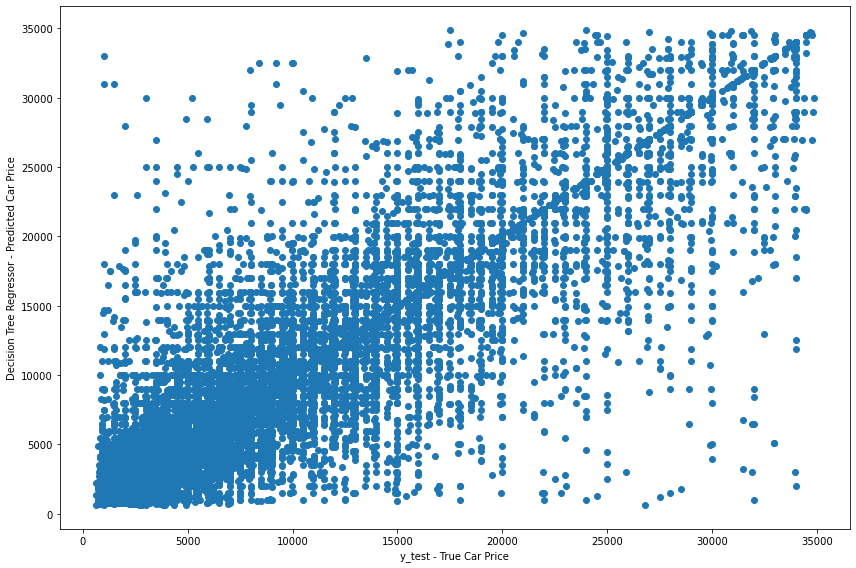

In [62]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, Tree_Preds)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Decision Tree Regressor - Predicted Car Price')
plt.tight_layout()

Look at the result of the decision tree model, the performance of the decision tree is much better than linear regression. And the r2 score is around 0.72. In the diagram, the distribution of the predicted price and the real price is more reasonable. 

## 9.5 Model 5 - Random Forest 

An ensemble of randomized decision trees is known as Random Forest. And Random Forest often produces a good prediction result. But the main limitation of random forest is that a large number of trees can make the algorithm a little slow. 

In [63]:
Random_Forest = RandomForestRegressor(random_state = 42)

In [64]:
Random_Forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
Random_Forest_Preds = Random_Forest.predict(X_test)

In [66]:
print('MSE:', metrics.mean_squared_error(y_test, Random_Forest_Preds))
print('RMsE:', np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Preds)))
print('R2: ', metrics.r2_score(y_test, Random_Forest_Preds))

MSE: 8436659.007608073
RMsE: 2904.5927438469016
R2:  0.856592359519181


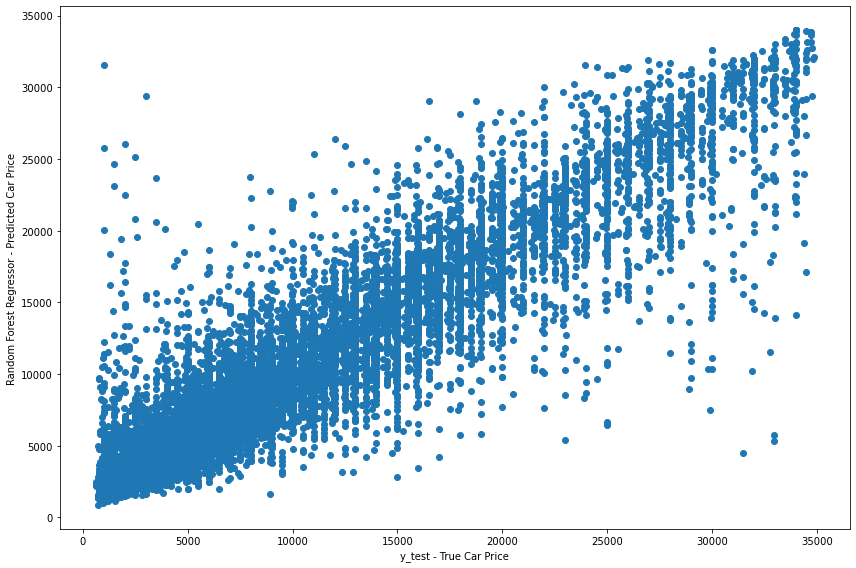

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, Random_Forest_Preds)
plt.xlabel('y_test - True Car Price')
plt.ylabel('Random Forest Regressor - Predicted Car Price')
plt.tight_layout()

The performance of random forest is the best among all models. The r2 score is around 0.86. 

# 10. Conclusion

Before predicting the price of used cars with five models, we also analyzed the impact of each feature on the price of used cars and came to the following conclusions: 

•	Cars with prices ranging from 3000 to 10000 are more popular

•	Cars that traveled 70000 to 150000 miles are more popular

•	Diesel cars are more expensive than other cars

•	Cars equipped with all-wheel drives tend to be more expensive

•	Top three states with the most transaction are CA, FL and NY

•	The average car price in most states is between 10000 to 15000

•	The average price of more popular manufacturers is between 10000 to 15000


Then we start to train our data with five different models. After preprocessing the raw data by dropping all missing values and handling outliers. Then the data was split into 8:2 train to test ratio. Then we construct five models to train our data. And the MSE score, RMSE score, and R2 score of each model are shown in the table: 

Table: Results of Models

                                MSE 	    RMSE       R2

Linear Regression　　　　　　　　 29920631.4776　　5469.9755　　0.4914

Lasso Regression　　　　　　　 　 29920631.5221　　5469.9755　　0.4914

Polynomial Linear Regression　　　17195299.5673　　4146.7215　　0.7077

Decision Tree　　　　　　　　　　16538524.6618　　4066.7584　　0.7189

Random Forest　　　　　　　　　8436659.0076　　　2904.5927　　0.8566


From the results obtained from these five models, the Random Forest Regression model produced the best results. Hence it is the regression model selected for predicting the price of used cars. 


